In [5]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/handwritten-digit-recognition/train.csv
/kaggle/input/handwritten-digit-recognition/test.csv


In [6]:
df = pd.read_csv("/kaggle/input/handwritten-digit-recognition/train.csv")

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(42000, 785)

In [9]:
df.columns[:10]

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8'],
      dtype='object')

In [10]:
X = df.drop('label', axis=1)
y = df['label']

In [11]:
X.shape, y.shape

((42000, 784), (42000,))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

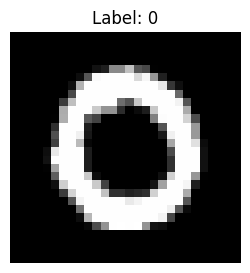

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.imshow(X.iloc[1].values.reshape(28, 28), cmap='gray')
plt.title(f"Label: {y.iloc[1]}")
plt.axis('off')

In [16]:
X = X / 255.0

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto')

In [20]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7061904761904761

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

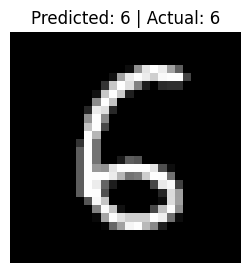

In [21]:
import matplotlib.pyplot as plt

index = 5  # try different numbers
plt.figure(figsize=(3,3))
plt.imshow(X_test.iloc[index].values.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {y_pred[index]} | Actual: {y_test.iloc[index]}")
plt.axis('off')

**We got low accuracy, 
now lets check with different model**
- using knn(n nearest neigbors)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
from sklearn.metrics import accuracy_score

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9648809523809524

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

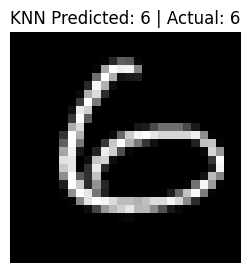

In [24]:
import matplotlib.pyplot as plt

idx = 10  # try different values
plt.figure(figsize=(3,3))
plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
plt.title(f"KNN Predicted: {y_pred_knn[idx]} | Actual: {y_test.iloc[idx]}")
plt.axis('off')

Trying different k values to find best k value and accuracy

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}, Accuracy = {acc}")

K = 1, Accuracy = 0.9686904761904762
K = 3, Accuracy = 0.9666666666666667
K = 5, Accuracy = 0.9648809523809524
K = 7, Accuracy = 0.9632142857142857
K = 9, Accuracy = 0.9613095238095238


As K increases, accuracy slowly decreases

* K = 1
  decision based on one single neighbor

* K = 3
  decision based on 3 neighbors (majority vote)

* K = 9
  decision based on 9 neighbors

In [26]:
final_knn = KNeighborsClassifier(n_neighbors=3)
final_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Test on unseen data

In [28]:
from sklearn.metrics import accuracy_score

y_pred_final = final_knn.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_accuracy

0.9666666666666667

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

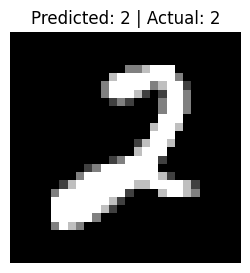

In [32]:
import matplotlib.pyplot as plt

index = 22  #changing to different index nos.   

plt.figure(figsize=(3,3))
plt.imshow(X_test.iloc[index].values.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {y_pred_final[index]} | Actual: {y_test.iloc[index]}")
plt.axis('off')

In [33]:
for i in range(5):
    print(
        f"Index {i}: Predicted = {y_pred_final[i]}, Actual = {y_test.iloc[i]}"
    )

Index 0: Predicted = 8, Actual = 8
Index 1: Predicted = 1, Actual = 1
Index 2: Predicted = 9, Actual = 9
Index 3: Predicted = 9, Actual = 9
Index 4: Predicted = 8, Actual = 8
